# 특정 키워드로 word2Vec 단어 유사도 보기

In [1]:
import pandas as pd
import numpy as np
import re

In [2]:
df = pd.read_csv('data/petition.csv', parse_dates=['start', 'end'])

In [3]:
p = r'.*(P2P|은행|금융|주식|증권|공매도).*'
finance = df[df['title'].str.match(p) |
           df['content'].str.match(p, flags=re.MULTILINE)]
finance.shape

(9876, 8)

In [4]:
finance.head()

,article_id,start,end,answered,votes,category,title,content
7,28,2017-08-19,2017-08-26,0,2137,경제민주화,소액주주를 보호해주십시오,** 존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
11,32,2017-08-19,2017-09-03,0,30,경제민주화,소액주주 보호를 위해 조사요청 드립니다.,"존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이..."
54,77,2017-08-20,2017-09-04,0,53,교통/건축/국토,"안양시청, 안양지청, 재개발조합 적폐가 심해 수사가 안되고 있습니다. 안양시 지장물...","※지장물관련 국토부의 해석 : 기존 건축물의 철거 공사에 관한 사항의 범위는 전기,..."
68,91,2017-08-20,2017-09-19,0,165,경제민주화,증권 자본시장개정안(상장폐지법 개정안),존경하는 문제인 대통령님께\n먼저 어렵고 힘든 국정운영을 이끄시느라 노고가 많으십니...
100,124,2017-08-20,2017-08-27,0,1,기타,포스코 관련,안녕하십니까?\n최근 뉴스에 주목을 못 받는 뉴스가 있습니다. 아시아경제tv의 포스...


In [5]:
finance.tail()

,article_id,start,end,answered,votes,category,title,content
192176,242610,2018-05-24,2018-06-23,0,0,경제민주화,전기통신 금융사기 피해방지 및 피해금 환급에 관한 특별법 수정,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192179,242614,2018-05-24,2018-06-23,0,1,기타,잘못된 법이 억울한 상황을 만들고 있는 것을 고쳐주셔요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192190,242633,2018-05-24,2018-06-23,0,20401,행정,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.,2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\n국민의...
192250,242718,2018-05-24,2018-06-23,0,14,기타,잘못 제정된 법의 피해를 막아주세요.,지난 4월 6일 전주지검을 사칭한 사람으로부터 보이스피싱을 당했습니다.\n지난 제 ...
192307,242801,2018-05-24,2018-06-23,0,7,경제민주화,범죄집단 삼성증권과 삼성바이오로직스 처벌바랍니다.,위조주식 찍어낸 삼성증권\n적자기업을 박근혜와 최순실에 의해 상장한 분식회계의 삼성...


In [6]:
# 샘플로 보고 싶은 인덱스의 번호를 넣어주세요.
sample_index = 192190

In [7]:
sample_title = finance['title'][sample_index]
sample_title

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.'

In [8]:
sample_content = finance['content'][sample_index]
sample_content

'2009년도 탄생 적폐제도(?) 신속(조기)집행 폐지를 간절히 청원합니다.\\n국민의 일원으로써, 일선지자체의 공무원으로써,\\n2009년도부터 실시되어 현재까지 시행중인 적폐 제도, 신속(조기,균형) 집행의 폐지를 청원합니다.\\n2008년 리먼사태로 세계 금융위기가 발생하였다는 이유로 2009년도에 시작된 조기집행...\\n(지극히 제 개인적인 생각입니다다만. 지나고 나서 돌아보니, 솔직히 그것 때문에 시작했다고 생각이 들지 않습니다.)\\n어찌되었든, 현재까지 10년동안 그 제도같지 않은 제도가 이름만 달리하면서(조기→균형→신속) 시행되고 있는 것으로 보아,\\n우리 국가는 매년을 급박한 경제위기속에서 신속(조기)집행으로 버티어 내고 있는 중인 것으로 보입니다.\\n또한, 해당 제도 시행의 근거로 제시되는 「상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응」에 따르면, 우리 국가는 금방이라도 부도가 날 지경인 것 같습니다.\\n현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다.\\n지난 10년동안 각종 폐해와 문제점이 지적되고 있음에도, 도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다.\\n각종 언론매체 등을 통해 제기된 부작용을 나열하면,\\n“단기간 과다한 공사발주로 부실 설계 우려”,\\n“지자체 이자 수입 감소와 재정 압박 초래”,\\n“발주 후 설계변경이나 중복 집행 등의 예산낭비”,\\n“공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등”,\\n“획일적 조기집행의 추진은 지방재정 안정성을 저해”,\\n“중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배”\\n등의 문제점이 전문가, 지자체장, 지방의원, 공무원 등에 의해 지속적으로 제기되어 왔습니다.\\n또한 행정안전부에서도 이미 그 폐해, 문제점을 인지하고 있습니다.\\n-2018년도 행정안전부 지방재정 신속집행 추진계획 3페이지\\n○자치단체, 지방의회, 공무원 단체 등에서 신속집행에 대한 문제점* 등을 들어 지속적으로 개선

# 텍스트 데이터 전처리 

In [9]:
def preprocessing(text):
    # 개행문자 제거
    text = re.sub('\\\\n', ' ', text)
    # 특수문자 제거
    text = re.sub('[?.,;:|\)*~`’!^\-_+<>@\#$%&-=#}※]', '', text)
    return text

In [10]:
sample_content = preprocessing(sample_content)
sample_content[:1000]

'년도 탄생 적폐제도 신속조기집행 폐지를 간절히 청원합니다 국민의 일원으로써 일선지자체의 공무원으로써 년도부터 실시되어 현재까지 시행중인 적폐 제도 신속조기균형 집행의 폐지를 청원합니다 년 리먼사태로 세계 금융위기가 발생하였다는 이유로 년도에 시작된 조기집행 지극히 제 개인적인 생각입니다다만 지나고 나서 돌아보니 솔직히 그것 때문에 시작했다고 생각이 들지 않습니다 어찌되었든 현재까지 년동안 그 제도같지 않은 제도가 이름만 달리하면서조기→균형→신속 시행되고 있는 것으로 보아 우리 국가는 매년을 급박한 경제위기속에서 신속조기집행으로 버티어 내고 있는 중인 것으로 보입니다 또한 해당 제도 시행의 근거로 제시되는 「상반기 어려운 고용상황 및 거시경제 불안요인 등에 대응」에 따르면 우리 국가는 금방이라도 부도가 날 지경인 것 같습니다 현재 우리 대한민국은 정말 그러한 상황인가 되묻고 싶습니다 지난 년동안 각종 폐해와 문제점이 지적되고 있음에도 도대체 어떤 이유로 현재까지 시행이 되고 있는지 이유를 찾을 수가 없습니다 각종 언론매체 등을 통해 제기된 부작용을 나열하면 “단기간 과다한 공사발주로 부실 설계 우려” “지자체 이자 수입 감소와 재정 압박 초래” “발주 후 설계변경이나 중복 집행 등의 예산낭비” “공사가 단기간에 집중되면서 공사현장에서 인건비나 자재비가 급등” “획일적 조기집행의 추진은 지방재정 안정성을 저해” “중앙정부의 예산조기집행은 지방자치와 지방재정 건전성 문제에 위배” 등의 문제점이 전문가 지자체장 지방의원 공무원 등에 의해 지속적으로 제기되어 왔습니다 또한 행정안전부에서도 이미 그 폐해 문제점을 인지하고 있습니다 년도 행정안전부 지방재정 신속집행 추진계획 페이지 ○자치단체 지방의회 공무원 단체 등에서 신속집행에 대한 문제점 등을 들어 지속적으로 개선 요구 ①이자수입 대폭 감소 ②상반기 공사집중으로 부실시공 우려 공사자재 품귀현상 발생 ③지역경제 활성화 파급효과 미미 ④무리한 실적경쟁으로 막대한 행정력 낭비 ⑤제도의 성과 분석과 평가 없이 매년 반복 시

In [11]:
# %time을 찍어주면 해당 코드를 실행할 때 걸리는 시간을 출력해 줍니다
%time sentences = finance['content'].apply(preprocessing)

CPU times: user 314 ms, sys: 13.7 ms, total: 328 ms
Wall time: 338 ms


# 토큰화

In [12]:
from soynlp.tokenizer import RegexTokenizer, LTokenizer, MaxScoreTokenizer

tokenizer = RegexTokenizer()
tokenizer

In [13]:
tokened_title = tokenizer.tokenize(sample_title)
tokened_title

['2009',
 '년도',
 '탄생',
 '적폐제도',
 '(?)',
 '신속',
 '(',
 '조기',
 ')',
 '집행',
 '폐지를',
 '간절히',
 '청원합니다',
 '.']

In [14]:
tokened_content = tokenizer.tokenize(sample_content)
tokened_content[:10]

['년도', '탄생', '적폐제도', '신속조기집행', '폐지를', '간절히', '청원합니다', '국민의', '일원으로써', '일선지자체의']

In [15]:
print(len(tokened_title))
print(len(tokened_content))

14
1146


In [16]:
%time tokens = sentences.apply(tokenizer.tokenize)
tokens[:3]

CPU times: user 15.1 s, sys: 161 ms, total: 15.3 s
Wall time: 15.4 s


7     [존경하옵는, 문재인대통령님께, 저는, 중국원양자원이라는, KOSPI, 상장사의, ...
11    [존경하는, 대통령님께, 코스피, 주식종목, 중국, 원양자원은, 현재, 계속되는, ...
54    [지장물관련, 국토부의, 해석, 기존, 건축물의, 철거, 공사에, 관한, 사항의, ...
Name: content, dtype: object

In [17]:
tokens[sample_index][:10]

['년도', '탄생', '적폐제도', '신속조기집행', '폐지를', '간절히', '청원합니다', '국민의', '일원으로써', '일선지자체의']

In [18]:
import logging
logging.basicConfig(
    format='%(asctime)s : %(levelname)s : %(message)s', 
    level=logging.INFO)

In [19]:
# 초기화 및 모델 학습
from gensim.models import word2vec

# 모델 학습
model = word2vec.Word2Vec(tokens, min_count=1)

model

2018-07-20 22:04:49,829 : INFO : 'pattern' package not found; tag filters are not available for English
2018-07-20 22:04:49,836 : INFO : collecting all words and their counts
2018-07-20 22:04:49,838 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-07-20 22:04:50,620 : INFO : collected 328069 word types from a corpus of 2151682 raw words and 9876 sentences
2018-07-20 22:04:50,621 : INFO : Loading a fresh vocabulary
2018-07-20 22:04:51,917 : INFO : min_count=1 retains 328069 unique words (100% of original 328069, drops 0)
2018-07-20 22:04:51,918 : INFO : min_count=1 leaves 2151682 word corpus (100% of original 2151682, drops 0)
2018-07-20 22:04:53,182 : INFO : deleting the raw counts dictionary of 328069 items
2018-07-20 22:04:53,191 : INFO : sample=0.001 downsamples 8 most-common words
2018-07-20 22:04:53,195 : INFO : downsampling leaves estimated 2138964 word corpus (99.4% of prior 2151682)
2018-07-20 22:04:53,198 : INFO : estimated required memory for 32

In [20]:
# 모델 이름을 지정하고 저장한다.
model_name = '1minwords'
model.save(model_name)

2018-07-20 22:05:15,699 : INFO : saving Word2Vec object under 1minwords, separately None
2018-07-20 22:05:15,701 : INFO : storing np array 'syn0' to 1minwords.wv.syn0.npy
2018-07-20 22:05:15,857 : INFO : not storing attribute syn0norm
2018-07-20 22:05:15,860 : INFO : storing np array 'syn1neg' to 1minwords.syn1neg.npy
2018-07-20 22:05:16,019 : INFO : not storing attribute cum_table
2018-07-20 22:05:16,949 : INFO : saved 1minwords


In [21]:
# 단어 사전 수
len(model.wv.vocab)

328069

In [22]:
# 단어 사전에서 상위 10개만 보기
vacab = model.wv.vocab
sorted(vacab, key=vacab.get, reverse=True)[:10]

['수', '있는', '있습니다', '그', '이', '합니다', '년', '"', '하는', '및']

In [23]:
# Counter로 자주 등장하는 단어 보기
from collections import Counter
dict(Counter(vacab).most_common(10))

{'"': <gensim.models.keyedvectors.Vocab at 0x131b3c7b8>,
 '그': <gensim.models.keyedvectors.Vocab at 0x131b37cf8>,
 '년': <gensim.models.keyedvectors.Vocab at 0x131b496a0>,
 '및': <gensim.models.keyedvectors.Vocab at 0x131b375f8>,
 '수': <gensim.models.keyedvectors.Vocab at 0x131b3f2b0>,
 '이': <gensim.models.keyedvectors.Vocab at 0x131b4d2e8>,
 '있는': <gensim.models.keyedvectors.Vocab at 0x131b3f710>,
 '있습니다': <gensim.models.keyedvectors.Vocab at 0x131b0fba8>,
 '하는': <gensim.models.keyedvectors.Vocab at 0x131b3fda0>,
 '합니다': <gensim.models.keyedvectors.Vocab at 0x131b39eb8>}

In [24]:
# 가장 적게 등장하는 단어
min(vacab, key=vacab.get)

'원양자원은'

In [25]:
model.wv['주식']

array([ 0.9114053 , -0.48566368, -0.12959702, -1.3158892 , -2.5232375 ,
        0.1961019 , -0.08409063, -0.02506666,  0.5140645 , -0.26504746,
        1.1600666 , -0.44991395,  1.0788691 , -1.2438239 , -0.17009398,
       -0.63108474, -0.45074934,  0.7161041 , -0.6852825 ,  0.5217392 ,
        1.2884831 ,  0.75283194,  0.9029756 , -1.5857643 , -0.848861  ,
       -0.07119783,  0.15880257, -1.4698519 , -0.00665396, -0.80874914,
        0.5480647 , -0.1404182 ,  0.28447574, -2.1166544 ,  0.36862418,
       -0.65539485,  0.48959506, -1.1582395 ,  1.2866966 , -0.33113045,
        0.8558026 ,  1.4885277 , -1.4943461 ,  0.02770608, -0.20405309,
        0.65584123,  0.4992455 ,  2.054331  , -0.50350773, -4.3344    ,
        0.27808398,  0.01573043,  0.56698287, -0.25809357, -2.8550603 ,
       -0.46851137,  0.32672936, -0.73474663,  0.3176808 ,  2.3939247 ,
        0.699708  , -0.44721186, -1.4014854 ,  0.7721443 , -2.3229659 ,
       -2.186133  , -2.4761624 ,  1.5146353 , -0.28036797, -0.61

In [26]:
model.wv.most_similar('주식')

2018-07-20 22:05:18,158 : INFO : precomputing L2-norms of word weight vectors


[('부동산', 0.9379349946975708),
 ('산돈은', 0.9269161224365234),
 ('공매수', 0.9247696399688721),
 ('투자', 0.924591064453125),
 ('투기', 0.9149326682090759),
 ('스포츠토토', 0.9145811200141907),
 ('시장', 0.9099521636962891),
 ('공매도', 0.9088576436042786),
 ('불법불의', 0.9081524014472961),
 ('됐을땐', 0.9052834510803223)]

In [27]:
# 유사도가 없는 단어 추출
model.wv.doesnt_match('부동산 증권 현금 코스닥 코스피'.split())

'부동산'

In [28]:
# 가장 유사한 단어를 추출
model.wv.most_similar('주식')

[('부동산', 0.9379349946975708),
 ('산돈은', 0.9269161224365234),
 ('공매수', 0.9247696399688721),
 ('투자', 0.924591064453125),
 ('투기', 0.9149326682090759),
 ('스포츠토토', 0.9145811200141907),
 ('시장', 0.9099521636962891),
 ('공매도', 0.9088576436042786),
 ('불법불의', 0.9081524014472961),
 ('됐을땐', 0.9052834510803223)]

In [29]:
# 가장 유사한 단어를 추출
model.wv.most_similar('공매도')

[('제도', 0.9194024801254272),
 ('폐지', 0.9102805852890015),
 ('행위이다', 0.9102120995521545),
 ('주식', 0.9088577628135681),
 ('공매수', 0.9080320000648499),
 ('폐지내지는', 0.9047994017601013),
 ('한시적이라도', 0.9007924795150757),
 ('사기발행을', 0.8986130356788635),
 ('건의드립니다', 0.898224949836731),
 ('없애', 0.8894612193107605)]

In [30]:
model.wv.most_similar(positive=['주식', '증권'], negative=['현금'])

[('공매도', 0.89720618724823),
 ('거래소', 0.888264536857605),
 ('공매수', 0.8829558491706848),
 ('부동산', 0.8779465556144714),
 ('폐지내지는', 0.8765919804573059),
 ('채굴부품', 0.8749051094055176),
 ('됐을땐', 0.865596354007721),
 ('비중에', 0.8647138476371765),
 ('상환개월로', 0.8625303506851196),
 ('제도', 0.8610805869102478)]

# 단어 유사도

In [31]:
model.wv.similarity('주식', '부동산')

0.9379348736458197

In [32]:
model.wv.similarity('주식', '투자')

0.9245909902410305

In [33]:
model.wv.similarity('주식', '증권')

0.878590046683312

In [34]:
model.wv.similarity('주식', '현금')

0.7156592089431543

In [35]:
model.wv.similarity('삼성', '증권')

0.9333605942423673

In [36]:
model.wv.similarity('삼성증권', '공매도')

0.7734644155222482

# 단어 유사도 시각화

In [37]:
from sklearn.manifold import TSNE
import matplotlib as mpl
import matplotlib.pyplot as plt
import gensim 
import gensim.models as g

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

model_name = '1minwords'
model = g.Doc2Vec.load(model_name)

2018-07-20 22:05:19,269 : INFO : loading Doc2Vec object from 1minwords
2018-07-20 22:05:20,705 : INFO : loading wv recursively from 1minwords.wv.* with mmap=None
2018-07-20 22:05:20,706 : INFO : loading syn0 from 1minwords.wv.syn0.npy with mmap=None
2018-07-20 22:05:20,768 : INFO : setting ignored attribute syn0norm to None
2018-07-20 22:05:20,769 : INFO : loading syn1neg from 1minwords.syn1neg.npy with mmap=None
2018-07-20 22:05:20,865 : INFO : setting ignored attribute cum_table to None
2018-07-20 22:05:20,866 : INFO : loaded 1minwords


In [38]:
# Doc2Vec으로 만든 모델을 가져옴
vocab = list(model.wv.vocab)
# 모델의 단어를 피처로 지정해 준다.
X = model[vocab]

print('Feature의 길이 {}'.format(len(X)))
print(X[0][:10])
tsne = TSNE(n_components=2)

# 모든 단어를 그래프에 출력하면 글자가 너무 많이 겹치기 때문에 일부 단어에 대해서만 시각화
X_tsne = tsne.fit_transform(X[:200,:])

/Users/corazzon/codes/jupyter/lib/python3.6/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  after removing the cwd from sys.path.


Feature의 길이 328069
[-0.07686872  0.07655254  0.31751388 -0.07306518  0.05633638  0.01997559
 -0.14370981 -0.02055826  0.05063013 -0.17417817]


In [39]:
df = pd.DataFrame(X_tsne, index=vocab[:200], columns=['x', 'y'])
df.shape

(200, 2)

In [40]:
df.head(20)

,x,y
존경하옵는,6.666693,-4.858394
문재인대통령님께,5.371867,-6.619864
저는,-8.730428,1.894576
중국원양자원이라는,9.842868,-9.984292
KOSPI,3.668380,-6.358191
상장사의,6.414317,-8.057941
소액,-2.136377,2.206671
주주입니다,4.713225,-6.113339
중국원양자원이하,9.199086,-9.903600
중원은,8.857417,-9.522737


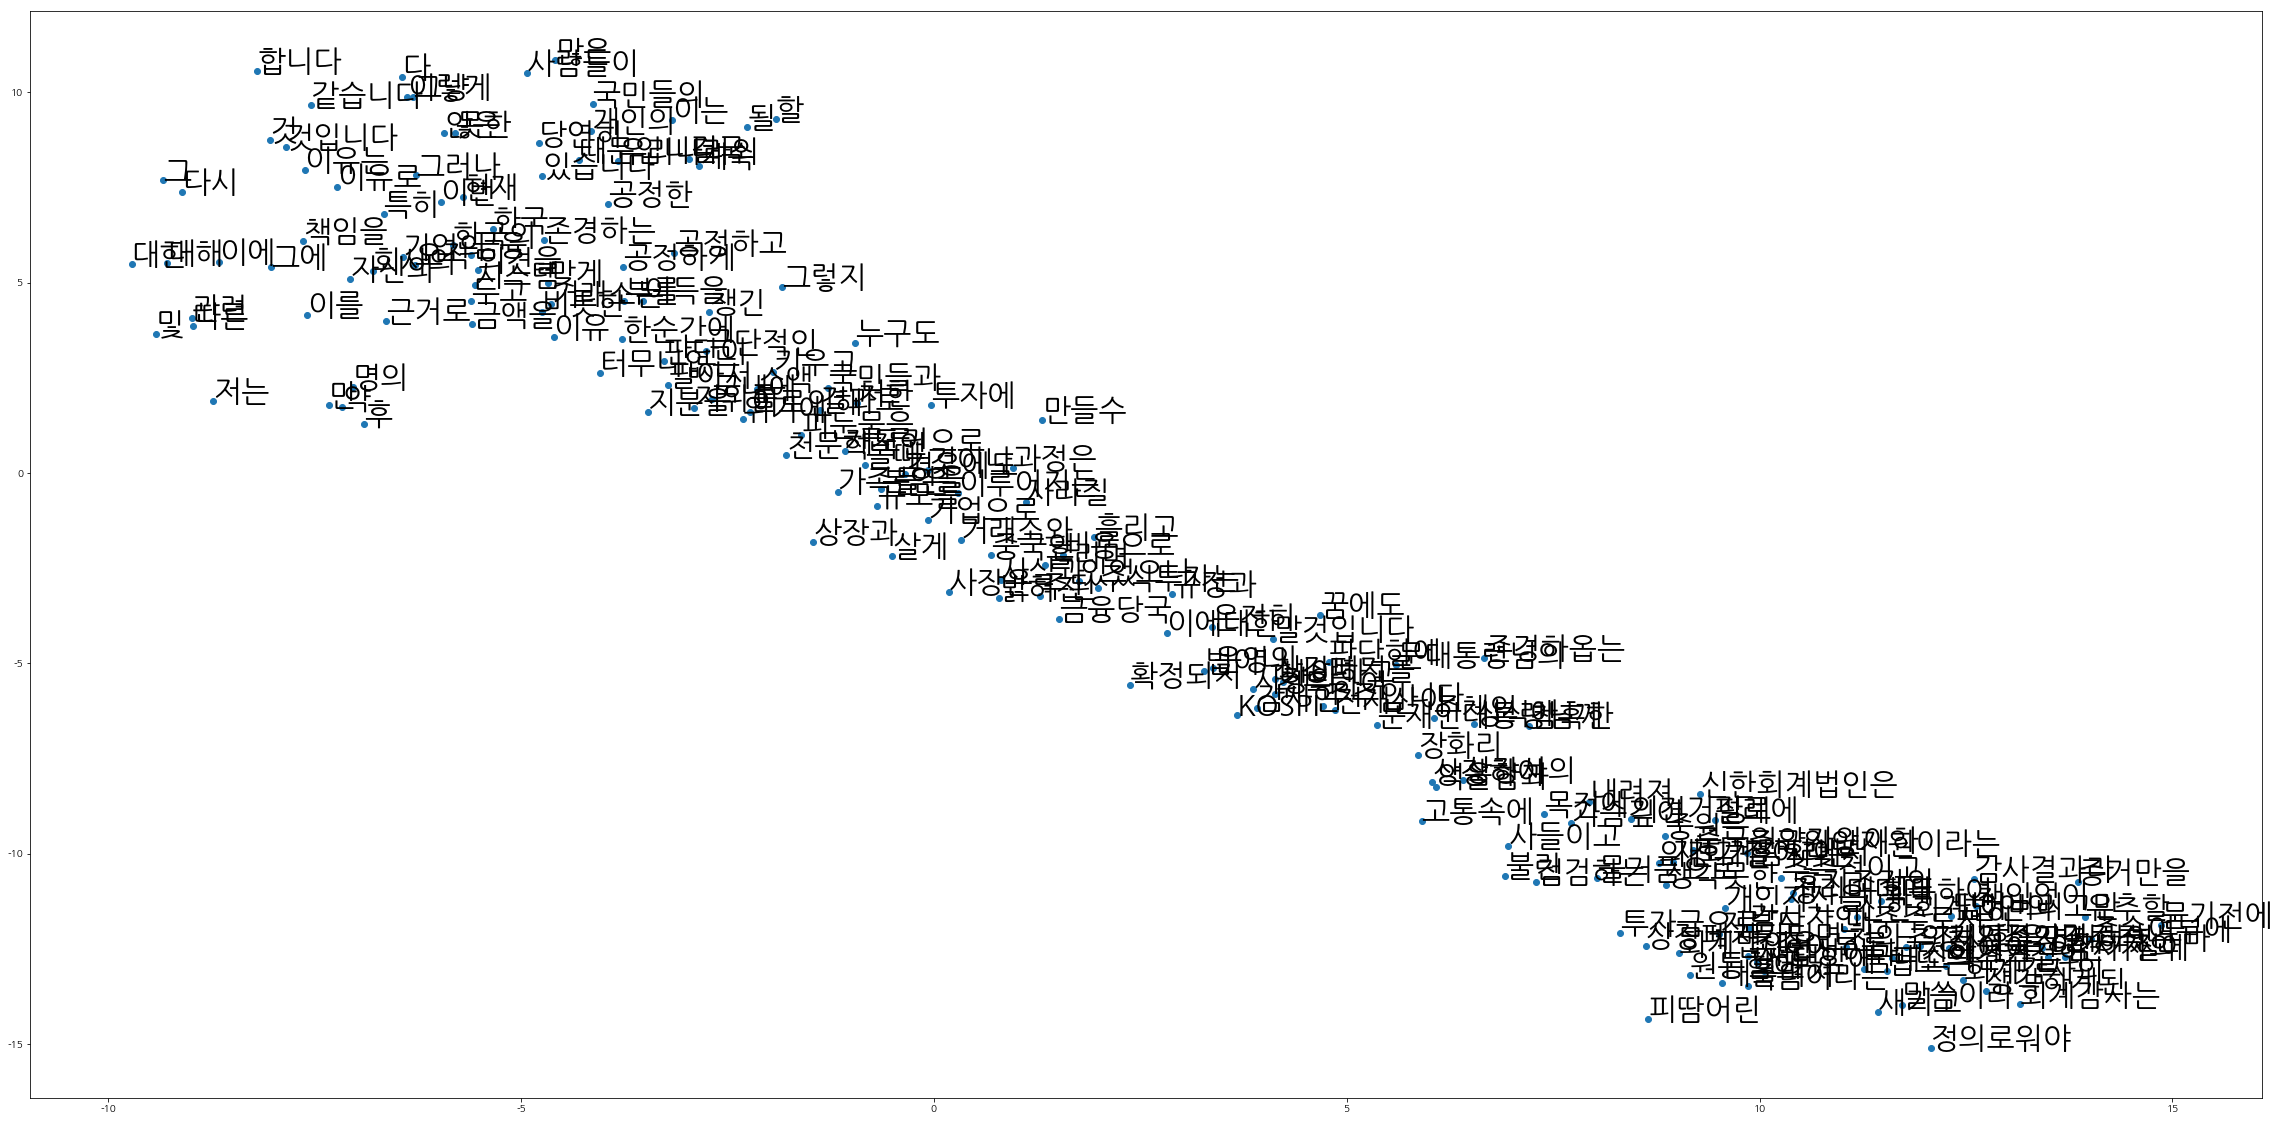

In [41]:
fig = plt.figure()
fig.set_size_inches(40, 20)
ax = fig.add_subplot(1, 1, 1)

ax.scatter(df['x'], df['y'])

for word, pos in df.iterrows():
    ax.annotate(word, pos, fontsize=30)
plt.show()